In [18]:
using Plots, LinearAlgebra, Statistics, Distributions, StatsBase, DataFrames


In [19]:
#Liczba agentów rodzaju I
Nᴵ = 5000
#Liczba agentów rodzaju II
Nᴵᴵ = 25000
#Liczba agentów rodzaju III
Nᴵᴵᴵ = 50000  #SUMA 80000 (8*10^4)
#Ceny

P_górna⁽¹⁾= 35000
P_górna⁽²⁾= 25000
P_dolna⁽¹⁾= 23000
P_górna⁽³⁾= 19000
P_dolna⁽²⁾= 18000
P_dolna⁽³⁾= 8000;

P_górna⁽¹⁾= P_górna⁽¹⁾/1000
P_górna⁽²⁾= P_górna⁽²⁾/1000
P_dolna⁽¹⁾= P_dolna⁽¹⁾/1000
P_górna⁽³⁾= P_górna⁽³⁾/1000
P_dolna⁽²⁾= P_dolna⁽²⁾/1000
P_dolna⁽³⁾= P_dolna⁽³⁾/1000

T = 12*40 #12 miesięcy - rok, 20 lat
CZAS = 12*5 #Piętnastoletnie ,,pożyczki" - zablokowanie czasu do szukania nowego mieszkania (można szukać tylko gdy CZASₙ = 0);
#Początkowe rozmieszczenie - przestrzenie trzech dzielnic: ciągłe
α₁ = 1 #Współczynnik kształtu - im większy tym ,,chudszy" ogon rozkładu PAreta
θ₁ = 0.1 #Skala - dla rozkładów Pareta x > θ (śmieszny błąd Julii - to co jest przed nawiasem to ,,vartheta", ale w komentarzach pojawia się również gdy wpiszemy \theta+TAB)
α₂ = 2
θ₂ = 0.1
α₃ = 5
θ₃ = 0.1

Pocz_rozk_I = Pareto(α₁, θ₁)
Pocz_rozk_II = Pareto(α₂, θ₂)
Pocz_rozk_III = Pareto(α₃, θ₃)
AGENCI = zeros(Nᴵ+Nᴵᴵ+Nᴵᴵᴵ,1,1,1,1,T)
AGENCI[1,1,1,1,1,1]

#Początkowe rozmieszczenie - przestrzenie trzech dzielnic: ciągłe
α₁ = 1 #Współczynnik kształtu - im większy tym ,,chudszy" ogon rozkładu PAreta
θ₁ = 0.1 #Skala - dla rozkładów Pareta x > θ (śmieszny błąd Julii - to co jest przed nawiasem to ,,vartheta", ale w komentarzach pojawia się również gdy wpiszemy \theta+TAB)
α₂ = 2
θ₂ = 0.1
α₃ = 5
θ₃ = 0.1

Pocz_rozk_I = Pareto(α₁, θ₁)
Pocz_rozk_II = Pareto(α₂, θ₂)
Pocz_rozk_III = Pareto(α₃, θ₃)
AGENCI = zeros(Nᴵ+Nᴵᴵ+Nᴵᴵᴵ,5,T) #[INDEKS AGENTA, [DZIELNICA,DOCHÓD,PIERWSZA WSPÓŁRZĘDNA,DRUGA WSPÓŁRZĘDNA,CZAS TRWANIA DŁUGU],T]
przyrost_param = 0.1

for n in 1:Nᴵ
     while AGENCI[n,2,1] <= 0 || AGENCI[n,2,1] > P_górna⁽¹⁾ || AGENCI[n,2,1] < P_dolna⁽¹⁾
        AGENCI[n,2,1] = rand(Pocz_rozk_III)*P_górna⁽¹⁾*5 #MOŻE TO BYĆ INNY MNOŻNIK, ALE SAMO P_górna MOŻE ZABRAĆ                                                                                                #WIĘCEJ CZASU
    end
    AGENCI[n,1,1:2] .= 1
    AGENCI[n,3,1:2] .= AGENCI[n,2,1] 
    AGENCI[n,4,1:2] .= rand(Uniform(0, 1))
end
 
for n in Nᴵ+1:Nᴵ+Nᴵᴵ
    while AGENCI[n,2,1] <= 0 || AGENCI[n,2,1] > P_górna⁽²⁾ || AGENCI[n,2,1] < P_dolna⁽²⁾
        AGENCI[n,2,1] = rand(Pocz_rozk_III)*P_górna⁽²⁾*5
    end
    AGENCI[n,1,1:2] .= 2
    AGENCI[n,3,1:2] .= AGENCI[n,2,1] 
    AGENCI[n,4,1:2] .= rand(Uniform(0, 1))
end
 
for n in Nᴵ+Nᴵᴵ+1:Nᴵ+Nᴵᴵ+Nᴵᴵᴵ
    while AGENCI[n,2,1] <= 0 || AGENCI[n,2,1] > P_górna⁽³⁾ || AGENCI[n,2,1] < P_dolna⁽³⁾
        AGENCI[n,2,1] = rand(Pocz_rozk_III)*P_górna⁽³⁾*5
    end
    AGENCI[n,1,1:2] .= 3
    AGENCI[n,3,1:2] .= AGENCI[n,2,1] 
    AGENCI[n,4,1:2] .= rand(Uniform(0, 1))
end

#ILU AGENTÓW MA POCZĄTKOWO NIEZEROWY DŁUG (SPŁATY POZA MODELEM)?
Nᵖᵒᶜᶻᵈᵍ = Nᴵ+Nᴵᴵ+Nᴵᴵᴵ
X = rand(1:Nᴵ + Nᴵᴵ + Nᴵᴵᴵ,Nᵖᵒᶜᶻᵈᵍ)
for m in 1:Nᵖᵒᶜᶻᵈᵍ
    AGENCI[X[m],5,1] =  rand(1:CZAS) #LOSOWA ZAPADALNOŚĆ DŁUGU - TUTAJ JEST TO LICZBA MIESIĘCY OD ZACIĄGNIĘCIA
    if AGENCI[X[m],5,1] == CZAS
        AGENCI[X[m],5,2] = 0
    else
        AGENCI[X[m],5,2] = AGENCI[X[m],5,1] + 1
    end
end

## Wizualizacja uciętych rozkładów Pareto

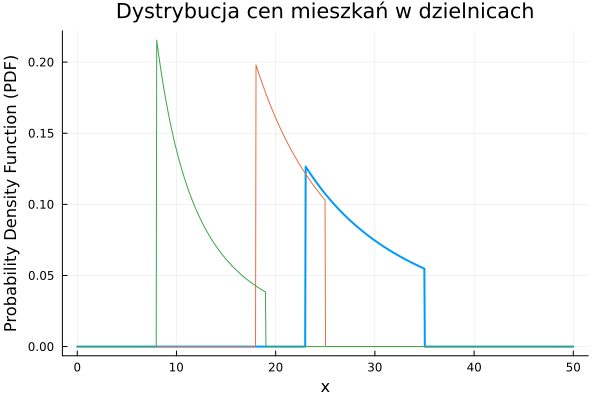

In [20]:

# Define the truncated Pareto distribution
d1 = truncated(Pocz_rozk_I, P_dolna⁽¹⁾, P_górna⁽¹⁾)
d2 = truncated(Pocz_rozk_I, P_dolna⁽²⁾, P_górna⁽²⁾)
d3 = truncated(Pocz_rozk_I, P_dolna⁽³⁾, P_górna⁽³⁾)

# Generate a range of x values
x = range(0, stop=50, length=1000)

# Compute the PDF at each x value
y1 = pdf.(d1, x)
y2 = pdf.(d2, x)
y3 = pdf.(d3, x)

przyrost_2 = pdf.(Pocz_rozk_II*P_górna⁽²⁾*0.025,x)

# Create the plot
plot(x, y1, 
    xlabel="x", 
    ylabel="Probability Density Function (PDF)", 
    title= "Dystrybucja cen mieszkań w dzielnicach", 
    legend=false,
    linewidth=2)
plot!(x, y2)
plot!(x, y3) 


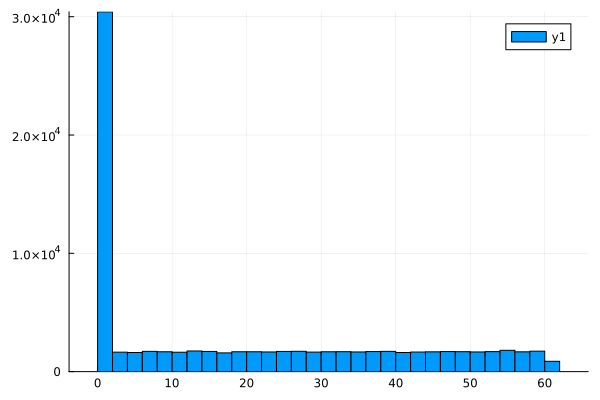

In [35]:
histogram(AGENCI[:,5,2])
# Ludziom dług znika!!!
# AGENCI[1:20,5,2:3]

AGENCI
1. wymiar - nr agenta
2. wymiar
    * 1 kolumna - dzielnica
    * 2 kolumna - majątek
    * 3 kolumna - cena mieszkanie
    * 4 kolumna - wiek
    * 5 kolumna - dlug
3. wymiary - czas

In [22]:

@time begin
    for t in 2:T-1
        #WZROST/WAHANIA CEN?
        for n in 1:Nᴵ + Nᴵᴵ + Nᴵᴵᴵ
            # if n != 1
            #     continue
            # end 
            # Czy jestem w dzielnicy 3?
            if AGENCI[n,1,t] == 3
                przyrost = rand(Pocz_rozk_III)*P_górna⁽³⁾*przyrost_param
                while przyrost > P_górna⁽³⁾
                    przyrost = rand(Pocz_rozk_III)*P_górna⁽³⁾*przyrost_param
                end
                #Zwiększanie majątku
                AGENCI[n,2,t] = AGENCI[n,2,t-1] + przyrost
                #Jeżeli mój majątek wzrósł i nie mam długu
                if AGENCI[n,2,t] > AGENCI[n,2,t-1] && AGENCI[n,5,t] == 0
                   #Szukamy lepszego miejsca
                   #Jeżeli mieszkam w domu kwalifikującym mnie do dzielnicy 3
                    if AGENCI[n,3,t] < P_dolna⁽²⁾ 
                        # print("3.1")
                        #Losujemy jakiś do z dzielnicy 3
                        próba = rand(truncated(Pocz_rozk_III; lower=P_dolna⁽³⁾, upper=P_górna⁽³⁾))
                        AGENCI[n,1,t+1] = 3
                        # Jeżeli móju majątek jest większy niż cena domu, a dom droższy od aktualnego
                        # to go kupuje i losujemy lokalizacje
                        if próba > AGENCI[n,3,t] && AGENCI[n,2,t] > próba
                            AGENCI[n,3,t+1] = próba
                            AGENCI[n,4,t+1] = rand(Uniform(0, 1))
                            AGENCI[n,5,t+1] = 1 # Zakup zaciągnieciem długu
                        else
                            AGENCI[n,3,t+1] = AGENCI[n,3,t]
                            AGENCI[n,4,t+1] = AGENCI[n,4,t]
                            AGENCI[n,5,t+1] = 0 #Brak długu
                        end
                    #Jeśli mój majątek umożliwia mi przeniesienie się do dzielnicy wyżej
                    else
                        # print("3.2")
                         #Losujemy jakiś do z dzielnicy 2 (ale nie droższy niż najdroższy z 3)
                        próba = rand(truncated(Pocz_rozk_III; lower=P_dolna⁽²⁾, upper=P_górna⁽³⁾))
                        # Jeżeli móju majątek jest większy niż cena domu, a dom droższy od aktualnego
                        # to go kupuje i losujemy lokalizacje
                        if próba > AGENCI[n,3,t] && AGENCI[n,2,t] > próba
                            AGENCI[n,1,t+1] = 2
                            AGENCI[n,3,t+1] = próba
                            AGENCI[n,4,t+1] = rand(Uniform(0, 1))
                            AGENCI[n,5,t+1] = 1 # Zakup skutkuje długiem
                        else
                            AGENCI[n,1,t+1] = 3
                            AGENCI[n,3,t+1] = AGENCI[n,3,t]
                            AGENCI[n,4,t+1] = AGENCI[n,4,t]
                            AGENCI[n,5,t+1] = 0 #Brak długu
                        end
                    end
                 # Jeśli mój majątek "spadł" lub miałem dług to:
                else
                    # print("3.3")
                    AGENCI[n,1,t+1] = 3
                    AGENCI[n,3,t+1] = AGENCI[n,3,t]
                    AGENCI[n,4,t+1] = AGENCI[n,4,t]
                    # Jak długu nie miałem lub nadszedł czas jego spłaty to dług się zeruje
                    if AGENCI[n,5,t] == 0 || AGENCI[n,5,t] == CZAS
                        AGENCI[n,5,t+1] = 0
                    # W przeciwym wypadku mój dług rośnie
                    else
                        AGENCI[n,5,t+1] = AGENCI[n,5,t] + 1
                    end
                end
            elseif AGENCI[n,1,t] == 2 
                przyrost = rand(Pocz_rozk_II)*P_górna⁽²⁾*przyrost_param
                while przyrost > P_górna⁽²⁾
                    przyrost = rand(Pocz_rozk_II)*P_górna⁽²⁾*przyrost_param
                end
                AGENCI[n,2,t] = AGENCI[n,2,t-1] + przyrost
                if AGENCI[n,2,t] > AGENCI[n,2,t-1] && AGENCI[n,5,t] == 0
                   #Szukamy lepszego miejsca
                    #próba = rand(Uniform(AGENCI[n,3,t-1],AGENCI[n,2,t]))
                    if AGENCI[n,3,t] < P_dolna⁽²⁾
                        # print("2.1")
                        próba = rand(truncated(Pocz_rozk_II; lower=P_dolna⁽²⁾, upper=P_górna⁽²⁾))
                        AGENCI[n,1,t+1] = 2
                        if próba > AGENCI[n,3,t] && AGENCI[n,2,t] > próba
                            AGENCI[n,1,t+1] = 2 # to musialem dodać
                            AGENCI[n,3,t+1] = próba
                            AGENCI[n,4,t+1] = rand(Uniform(0, 1))
                            AGENCI[n,5,t+1] = 1
                        else
                            AGENCI[n,1,t+1] = 2 # to musialem dodać
                            AGENCI[n,3,t+1] = AGENCI[n,3,t]
                            AGENCI[n,4,t+1] = AGENCI[n,4,t]
                            AGENCI[n,5,t+1] = 0
                        end
                    else
                        # print("2.2")
                        próba = rand(truncated(Pocz_rozk_II; lower=P_dolna⁽¹⁾, upper=P_górna⁽²⁾))
                         if próba > AGENCI[n,3,t] && AGENCI[n,2,t] > próba
                            AGENCI[n,1,t+1] = 1
                            AGENCI[n,3,t+1] = próba
                            AGENCI[n,4,t+1] = rand(Uniform(0, 1))
                            AGENCI[n,5,t+1] = 1
                        else
                            AGENCI[n,1,t+1] = 2
                            AGENCI[n,3,t+1] = AGENCI[n,3,t]
                            AGENCI[n,4,t+1] = AGENCI[n,4,t]
                            AGENCI[n,5,t+1] = 0
                        end
                    end
                else
                    # print("2.3")
                    AGENCI[n,1,t+1] = 2
                    AGENCI[n,3,t+1] = AGENCI[n,3,t]
                    AGENCI[n,4,t+1] = AGENCI[n,4,t]
                    if AGENCI[n,5,t] == 0 || AGENCI[n,5,t] == CZAS
                        AGENCI[n,5,t+1] = 0
                    else
                        AGENCI[n,5,t+1] = AGENCI[n,5,t] + 1
                    end
                end
            else
                przyrost = rand(Pocz_rozk_I)*P_górna⁽¹⁾*przyrost_param
                while przyrost > P_górna⁽¹⁾
                    przyrost = rand(Pocz_rozk_I)*P_górna⁽¹⁾*przyrost_param
                end
                AGENCI[n,2,t] = AGENCI[n,2,t-1] + przyrost
                if AGENCI[n,2,t] > AGENCI[n,2,t-1]  && AGENCI[n,5,t] == 0
                    # print("1.1")
                   #Szukamy lepszego miejsca
                    #próba = rand(Uniform(AGENCI[n,3,t-1],AGENCI[n,2,t]))
                    próba = rand(truncated(Pocz_rozk_I; lower=P_górna⁽²⁾, upper=P_górna⁽¹⁾))
                    if AGENCI[n,3,t] < próba && AGENCI[n,2,t] > próba
                        # próba = rand(truncated(Pocz_rozk_I; lower=P_górna⁽²⁾, upper=P_górna⁽¹⁾))
                        AGENCI[n,1,t+1] = 1
                        AGENCI[n,3,t+1] = próba
                        AGENCI[n,4,t+1] = rand(Uniform(0, 1))
                        AGENCI[n,5,t+1] = 1
                    else
                        AGENCI[n,1,t+1] = 1
                        AGENCI[n,3,t+1] = AGENCI[n,3,t]
                        AGENCI[n,4,t+1] = AGENCI[n,4,t]
                        AGENCI[n,5,t+1] = 0
                    end
                else
                    # print("1.2")
                    AGENCI[n,1,t+1] = 1
                    AGENCI[n,3,t+1] = AGENCI[n,3,t]
                    AGENCI[n,4,t+1] = AGENCI[n,4,t]
                    if AGENCI[n,5,t] == 0 || AGENCI[n,5,t] == CZAS
                        AGENCI[n,5,t+1] = 0
                    else
                        AGENCI[n,5,t+1] = AGENCI[n,5,t] + 1
                    end
                end
            end 
        end
    end
end



 61.778535 seconds (685.26 M allocations: 11.739 GiB, 5.30% gc time)


In [23]:
# using XLSX
# XLSX.writetable("agent_example3.xlsx", DataFrame(AGENCI[1,:,:], :auto))


rand(truncated(Pocz_rozk_III; lower=P_dolna⁽³⁾, upper=P_górna⁽³⁾))
rand(truncated(Pocz_rozk_I; lower=P_górna⁽²⁾, upper=P_górna⁽¹⁾))
rand(truncated(Pocz_rozk_II; lower=P_dolna⁽²⁾, upper=P_górna⁽²⁾))
rand()

0.4913305639379295

In [24]:
# using XLSX
# XLSX.writetable("agent_example_5.xlsx", DataFrame(, :auto))

transpose(AGENCI[(AGENCI[:,1,1] .== 3),5,1:4])

4×50000 transpose(::Matrix{Float64}) with eltype Float64:
 17.0  26.0  29.0  39.0  0.0  0.0  …  0.0  37.0  5.0  0.0  40.0  0.0  0.0
 18.0  27.0  30.0  40.0  0.0  0.0     0.0  38.0  6.0  0.0  41.0  0.0  0.0
 19.0  28.0  31.0  41.0  0.0  0.0     0.0  39.0  7.0  0.0  42.0  0.0  0.0
 20.0  29.0  32.0  42.0  0.0  1.0     0.0  40.0  8.0  0.0  43.0  0.0  0.0

## Na podstawie array AGENCI:
* Wykres udziałów dzielnicy według ludzi w niej zamieszkającej (procent całoście per dzielnica - 3 wykresy)
* Wykres udziałów dla wszystkich dzielnic jednocześnie (1)
* Wykresy logarytmów/zmian procentów per dzielnica (3 wykresy)

to będzie baza do dalszych wykresów, jak zwiększymy ilość agentów to będzie to wykorzystywane do analizy wrażliwości

In [25]:
dzielnice_counts_df = DataFrame()

for t in 1:T
    to_count = string.(AGENCI[:,1:1,t])
    counts = countmap(to_count)
    # print(t)
    for key in ["1.0", "2.0", "3.0"]
        if !(key in keys(counts))
            counts[key] = 0
        end 
    end
    if t == 1
        dzielnice_counts_df = DataFrame(counts)
    else
        tmp_df = DataFrame(copy(counts))
        dzielnice_counts_df = vcat(dzielnice_counts_df,tmp_df)
    end
end

# dzielnice_counts_df[!,:RowSum] = [sum(row) for row in eachrow(dzielnice_counts_df)];

rename!(dzielnice_counts_df, Dict(:1 => :district_1));
rename!(dzielnice_counts_df, Dict(:2 => :district_2));
rename!(dzielnice_counts_df, Dict(:3 => :district_3));

In [26]:
dzielnice_counts_df[:,["district_1","district_2","district_3"]]

Row,district_1,district_2,district_3
,Int64,Int64,Int64
1,5000,25000,50000
2,5000,25000,50000
3,5338,24693,49969
4,5891,24194,49915
5,6599,23525,49876
6,7289,22855,49856
7,8023,22133,49844
8,8857,21310,49833
9,9711,20469,49820


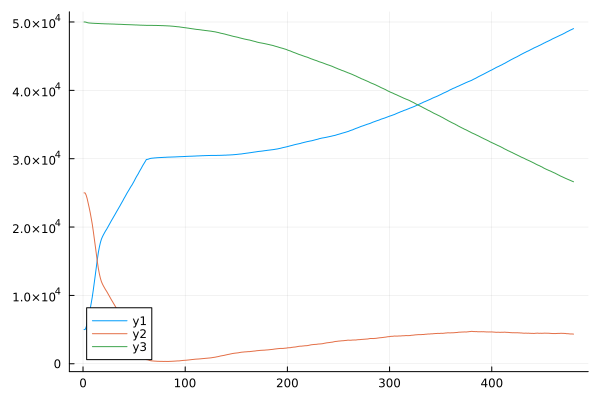

In [27]:

plot(dzielnice_counts_df."district_1")
plot!(dzielnice_counts_df."district_2")
plot!(dzielnice_counts_df."district_3")
# AGENCI[(AGENCI[:,1,3] .== 0.0),:,1:10][1,:,:]

In [28]:

# Apply the function to add a new column with log returns

function percent_change!(df::DataFrame, column::String)
    df[!, Symbol(string(column, "_pct"))] = [missing; diff(df[!, column])./ df[1:end-1, column]]
end

function add_log_returns!(df::DataFrame, column::String)
    df[!, Symbol(string(column, "_logpct"))] = [missing; diff(log.(df[!, column]))]
end


# Apply the function to add a new column with percent change and log returns
for col in names(dzielnice_counts_df)
    percent_change!(dzielnice_counts_df, col)
    add_log_returns!(dzielnice_counts_df, col)
end



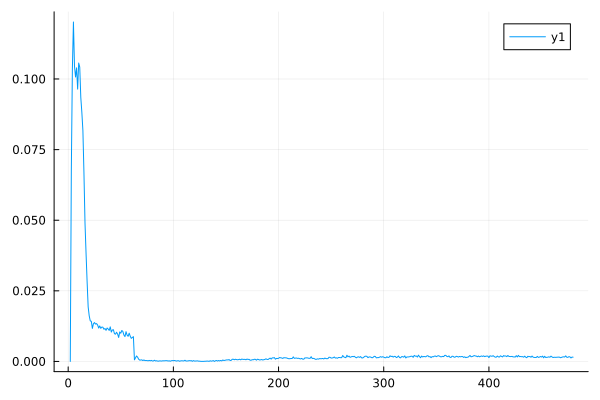

In [29]:
plot(dzielnice_counts_df."district_1_pct")

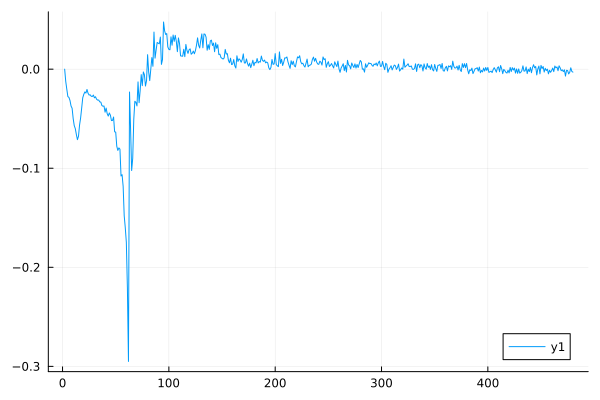

In [30]:
plot(dzielnice_counts_df."district_2_pct")

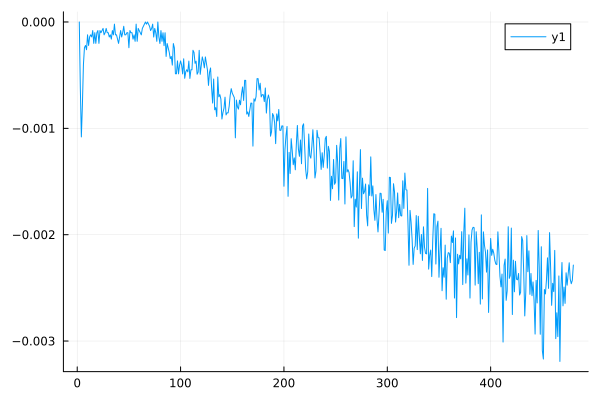

In [31]:
plot(dzielnice_counts_df."district_3_pct")

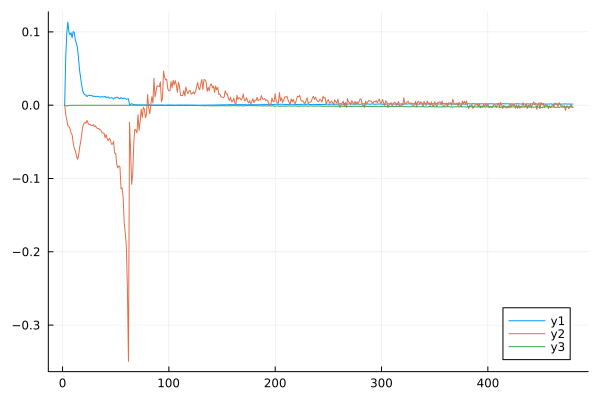

In [32]:
plot(dzielnice_counts_df."district_1_logpct")
plot!(dzielnice_counts_df."district_2_logpct")
plot!(dzielnice_counts_df."district_3_logpct")

## Skumulowany dług

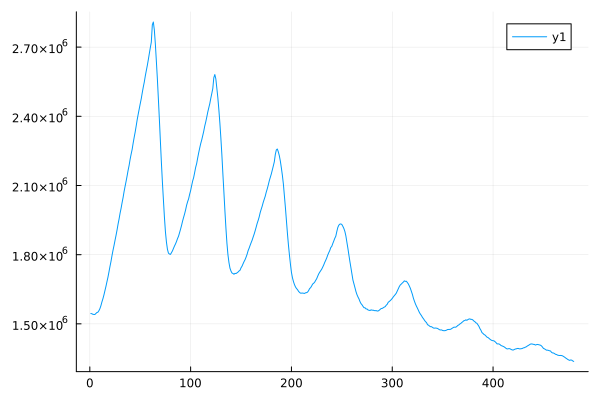

In [33]:
#WTFy xD - bedzie trzeba to zbadać
CZAS_SUMS = sum(AGENCI[:,5,:], dims = 1);
dlug_df = DataFrame(transpose(CZAS_SUMS), :auto)
plot(dlug_df.x1)

## Wielka spłata długu
#vvv